Health Insurance Cross Sell Prediction7

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 18})
sns.set(font_scale=2.5)

import missingno as msno
from sklearn.preprocessing import LabelEncoder

#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

#%matplotlib inlinethe current session

In [2]:
df_train = pd.read_csv("E:/github/Health Insurance Cross Sell Prediction/train.csv")
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df_test = pd.read_csv("E:/github/Health Insurance Cross Sell Prediction/test.csv")
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
for col in df_train.columns : 
    msg = 'columnn : {:>10}\t count of NaN value : {:.0f}'.format(col, 100 * (df_train[col].isnull().sum() ))
    print(msg)

columnn :         id	 count of NaN value : 0
columnn :     Gender	 count of NaN value : 0
columnn :        Age	 count of NaN value : 0
columnn : Driving_License	 count of NaN value : 0
columnn : Region_Code	 count of NaN value : 0
columnn : Previously_Insured	 count of NaN value : 0
columnn : Vehicle_Age	 count of NaN value : 0
columnn : Vehicle_Damage	 count of NaN value : 0
columnn : Annual_Premium	 count of NaN value : 0
columnn : Policy_Sales_Channel	 count of NaN value : 0
columnn :    Vintage	 count of NaN value : 0
columnn :   Response	 count of NaN value : 0


In [5]:
for col in df_test.columns : 
    msg = 'columnn : {:>10}\t count of NaN value : {:.0f}'.format(col, 100 * (df_test[col].isnull().sum() ))
    print(msg)

columnn :         id	 count of NaN value : 0
columnn :     Gender	 count of NaN value : 0
columnn :        Age	 count of NaN value : 0
columnn : Driving_License	 count of NaN value : 0
columnn : Region_Code	 count of NaN value : 0
columnn : Previously_Insured	 count of NaN value : 0
columnn : Vehicle_Age	 count of NaN value : 0
columnn : Vehicle_Damage	 count of NaN value : 0
columnn : Annual_Premium	 count of NaN value : 0
columnn : Policy_Sales_Channel	 count of NaN value : 0
columnn :    Vintage	 count of NaN value : 0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df_train.shape

(381109, 12)

In [8]:
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

In [9]:
int_column = df_train.dtypes[df_train.dtypes =='int64'].index |  df_train.dtypes[df_train.dtypes =='float64'].index

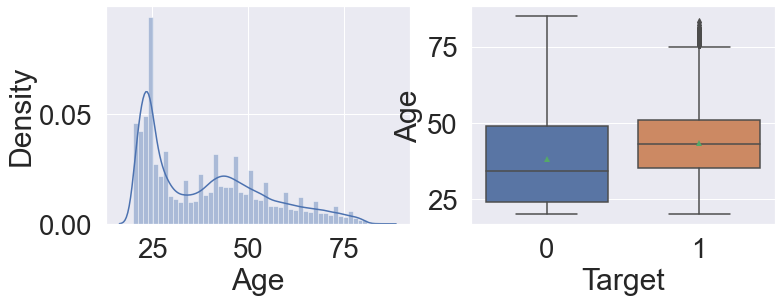

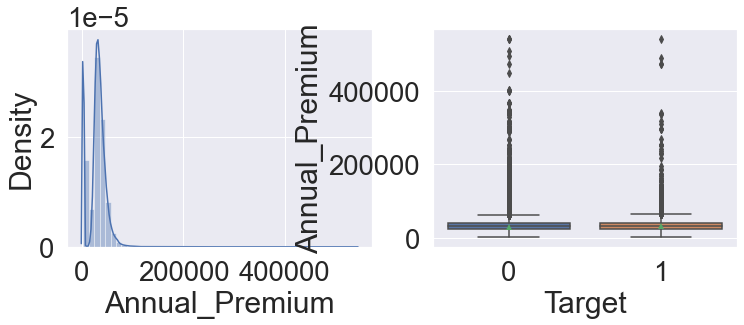

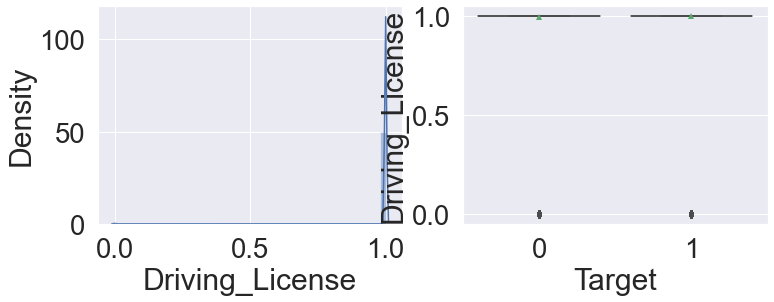

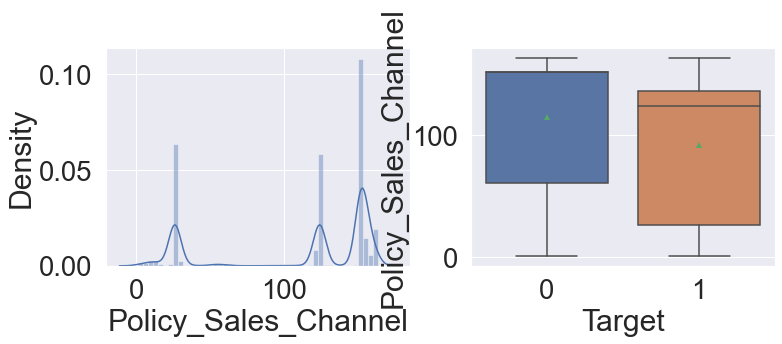

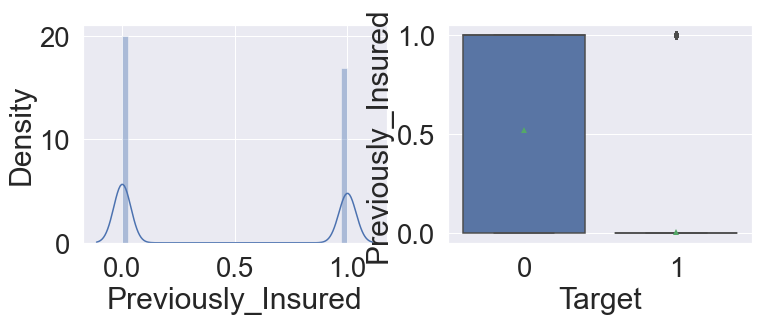

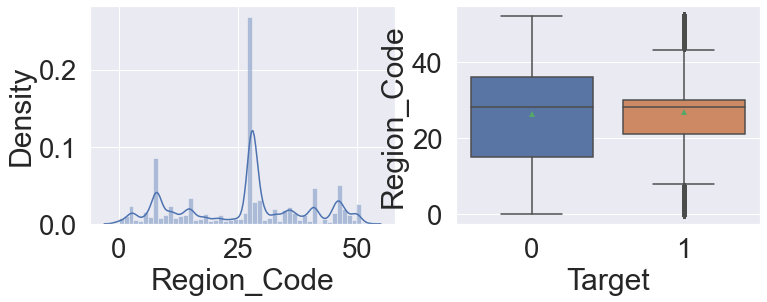

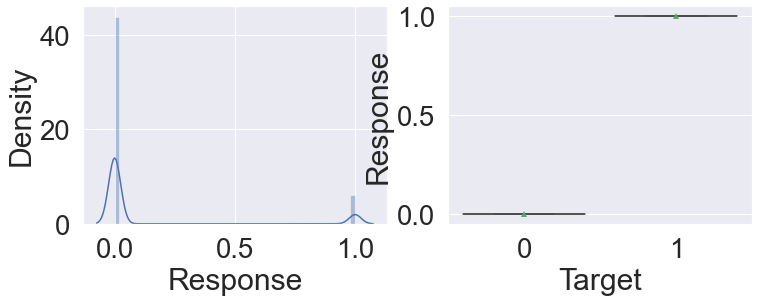

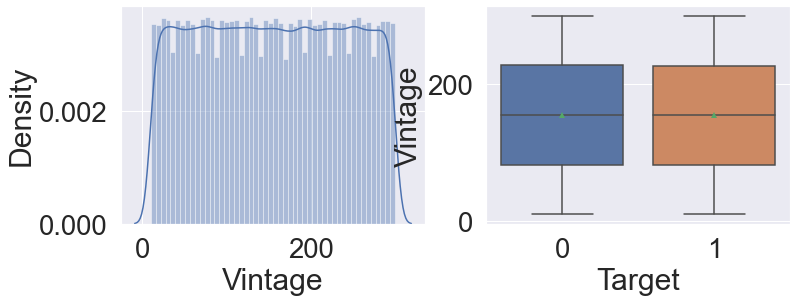

In [10]:
for col in int_column : 
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.distplot(df_train[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Response', y = col, data =df_train, showmeans = True)
    plt.xlabel('Target')
    plt.ylabel(col)
    
    plt.show()

In [11]:
obj_column = df_train.dtypes[df_train.dtypes == 'object'].index
for i in range(0, len(obj_column)) :
    print(obj_column[i])
    print(df_train[obj_column[i]].unique())
    print()

Gender
['Male' 'Female']

Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage
['Yes' 'No']



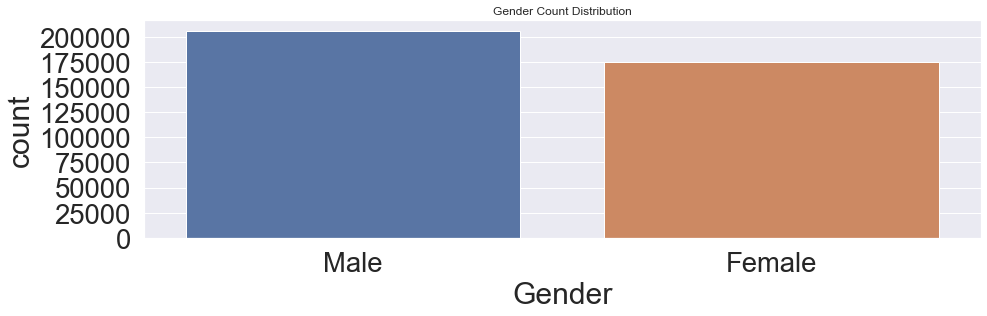

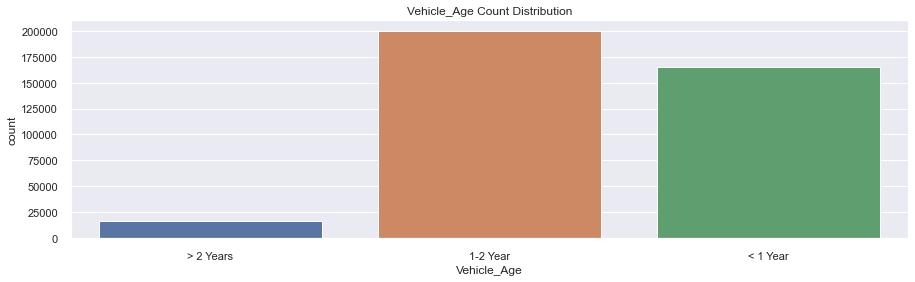

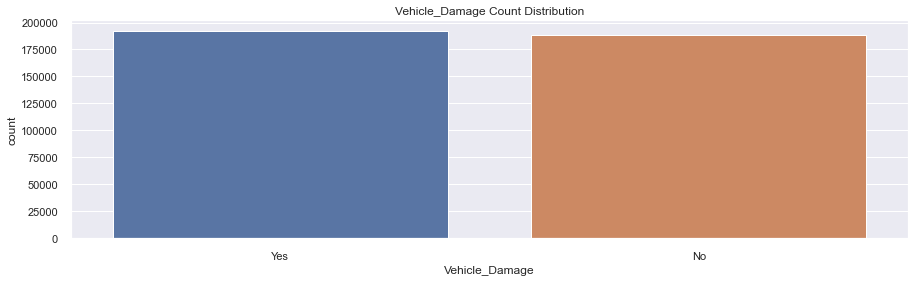

In [12]:
for i in range(0, len(obj_column)) :
    fig, ax = plt.subplots(figsize=(15,4))

    sns.countplot(x = obj_column[i], data = df_train)
    sns.set(font_scale=1)

    ax.set_title('{} Count Distribution'.format(obj_column[i]))

In [13]:
df_train.loc[df_train['Gender'] == 'Male', 'Gender'] = 0
df_train.loc[df_train['Gender'] == 'Female', 'Gender'] = 1
df_test.loc[df_test['Gender'] == 'Male', 'Gender'] = 0
df_test.loc[df_test['Gender'] == 'Female', 'Gender'] = 1

df_train.loc[df_train['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df_train.loc[df_train['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df_train.loc[df_train['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
df_test.loc[df_test['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df_test.loc[df_test['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df_test.loc[df_test['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

df_train.loc[df_train['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df_train.loc[df_train['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
df_test.loc[df_test['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df_test.loc[df_test['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [14]:
#pd.set_option('max_columns', None)
pd.options.display.max_rows = 0
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [15]:
#pd.set_option('max_columns', None)
pd.options.display.max_rows = 0
df_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,1,11.0,1,0,0,35786.0,152.0,53
1,0,40,1,28.0,0,1,1,33762.0,7.0,111
2,0,47,1,28.0,0,1,1,40050.0,124.0,199
3,0,24,1,27.0,1,0,1,37356.0,152.0,187
4,0,27,1,28.0,1,0,0,59097.0,152.0,297


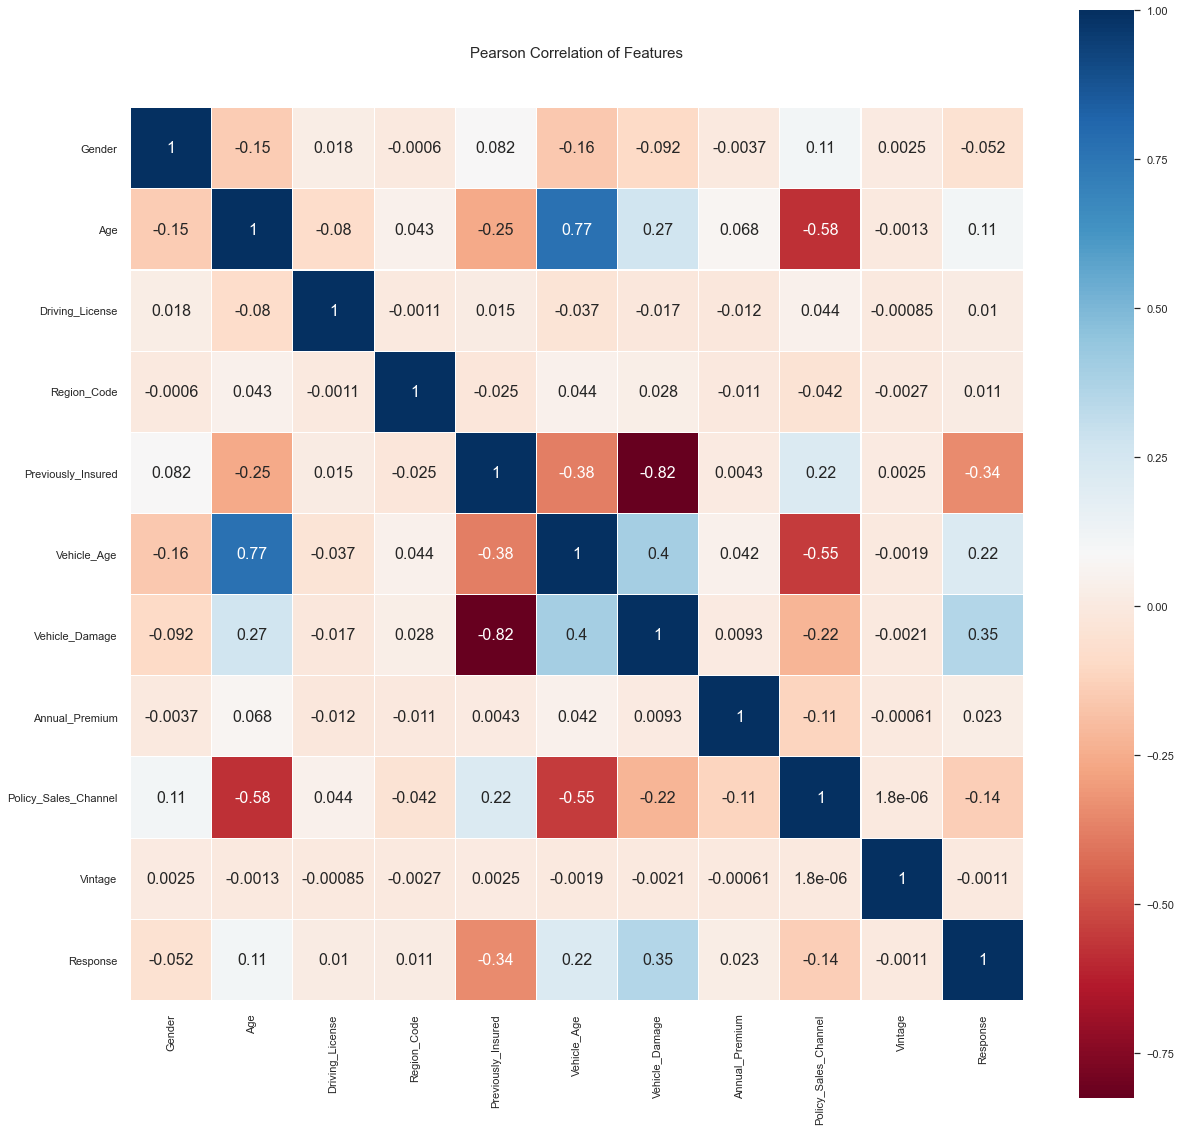

In [16]:
heatmap_data = df_train

colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y = 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})

del heatmap_data

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [19]:
df_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0
5,1,24,1,33.0,0,0,1,2630.0,160.0,176,0
6,0,23,1,11.0,0,0,1,23367.0,152.0,249,0
7,1,56,1,28.0,0,1,1,32031.0,26.0,72,1
8,1,24,1,3.0,1,0,0,27619.0,152.0,28,0
9,1,32,1,6.0,1,0,0,28771.0,152.0,80,0


In [20]:
df_test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,1,11.0,1,0,0,35786.0,152.0,53
1,0,40,1,28.0,0,1,1,33762.0,7.0,111
2,0,47,1,28.0,0,1,1,40050.0,124.0,199
3,0,24,1,27.0,1,0,1,37356.0,152.0,187
4,0,27,1,28.0,1,0,0,59097.0,152.0,297
5,0,22,1,30.0,1,0,0,40207.0,152.0,266
6,1,51,1,37.0,1,1,0,40118.0,26.0,107
7,0,25,1,41.0,1,0,0,23375.0,152.0,232
8,0,42,1,41.0,0,1,1,2630.0,26.0,277
9,1,37,1,12.0,1,1,0,27124.0,124.0,133


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Response',axis=1),
                                                    df_train['Response'],
                                                    test_size=.3, random_state = 42,
                                                    stratify= df_train['Response'])

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=df_train.drop('Response',axis=1).columns)
X_test = pd.DataFrame(X_test, columns=df_train.drop('Response',axis=1).columns)

In [23]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1.0,0.400000,1.0,0.442308,1.0,0.5,0.0,0.059408,0.154321,0.211073
1,0.0,0.476923,1.0,0.538462,1.0,0.5,0.0,0.054605,0.154321,0.228374
2,1.0,0.307692,1.0,0.634615,0.0,0.5,0.0,0.000000,0.067901,0.920415
3,1.0,0.123077,1.0,0.076923,1.0,0.0,0.0,0.000000,0.932099,0.737024
4,1.0,0.015385,1.0,0.711538,1.0,0.0,0.0,0.052664,0.981481,0.096886
5,0.0,0.092308,1.0,0.557692,1.0,0.0,0.0,0.070152,0.932099,0.325260
6,1.0,0.415385,1.0,0.096154,1.0,0.5,0.0,0.046963,0.932099,0.152249
7,1.0,0.030769,1.0,0.884615,1.0,0.0,0.0,0.050534,0.932099,0.491349
8,0.0,0.215385,1.0,0.057692,0.0,0.5,1.0,0.000000,0.962963,0.380623
9,0.0,0.030769,1.0,0.538462,1.0,0.0,0.0,0.063512,0.932099,0.259516


In [24]:
from sklearn.linear_model import LogisticRegression
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier()]

names = [ 'LogisticRegression',
         'DecisionTreeClassifier',
          'RandomForestClassifier',
          'XGBClassifier']

for model,name in zip(models,names):
    m = model.fit(X_train,y_train)
    print(name, 'report:')
    print('Train score',model.score(X_train,y_train))
    print('Test score',model.score(X_test,y_test))
    print()
    print("Train confusion matrix:\n",confusion_matrix(y_train, model.predict(X_train)),'\n')
    print("Test confusion matrix:\n",confusion_matrix(y_test, model.predict(X_test)))
    print('*'*50)

LogisticRegression report:
Train score 0.8772903109725013
Test score 0.8773932285516868

Train confusion matrix:
 [[233986     93]
 [ 32643     54]] 

Test confusion matrix:
 [[100289     31]
 [ 13987     26]]
**************************************************
DecisionTreeClassifier report:
Train score 0.9999100368848772
Test score 0.8239528395126516

Train confusion matrix:
 [[234079      0]
 [    24  32673]] 

Test confusion matrix:
 [[89790 10530]
 [ 9598  4415]]
**************************************************
RandomForestClassifier report:
Train score 0.9998800491798363
Test score 0.8673173974268147

Train confusion matrix:
 [[234071      8]
 [    24  32673]] 

Test confusion matrix:
 [[97480  2840]
 [12330  1683]]
**************************************************
XGBClassifier report:
Train score 0.8814211173418898
Test score 0.8766672789133496

Train confusion matrix:
 [[233559    520]
 [ 31114   1583]] 

Test confusion matrix:
 [[99840   480]
 [13621   392]]
****************

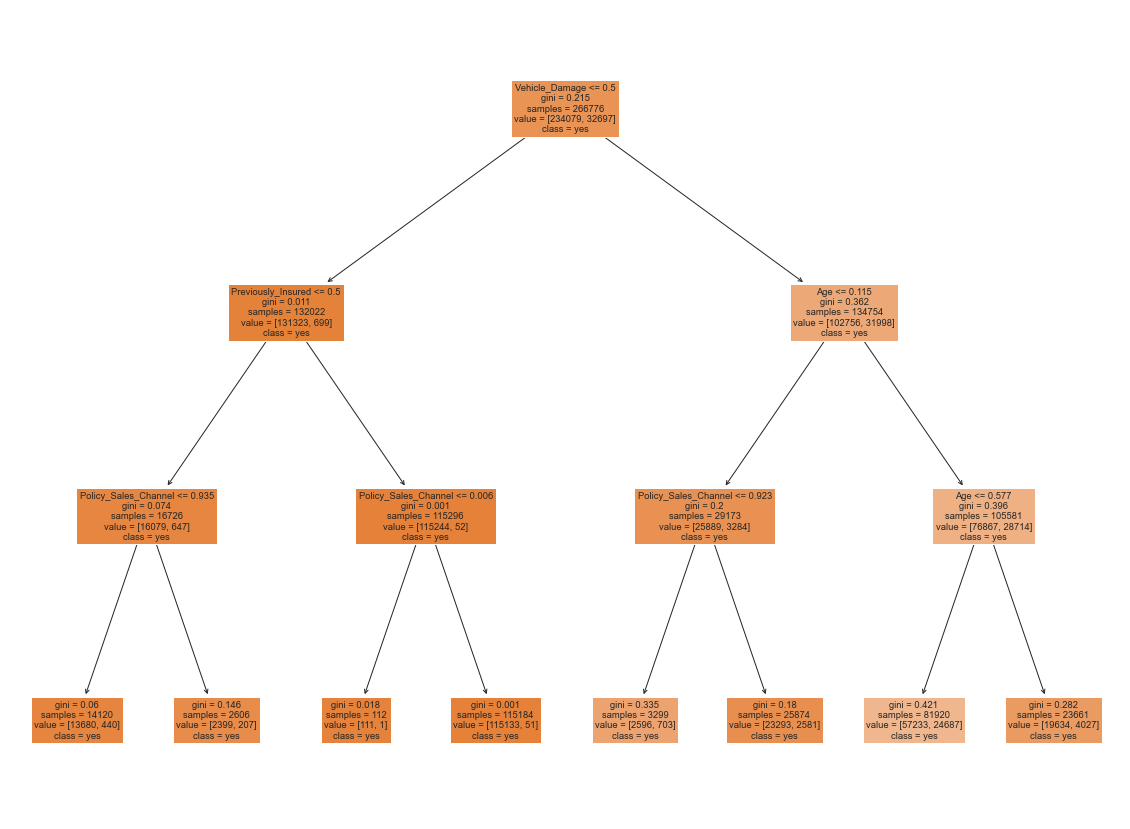

In [25]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(model,
          feature_names= df_train.drop('Response', axis=1).columns,  
          class_names= ['yes','no'],
          filled=True)
plt.show()

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

m = LogisticRegression().fit(X_train,y_train)
pred_y = m.predict(X_test)
print('*'*50)
print('Report')
print('model : LogisticRegression')
print('Train score',m.score(X_train,y_train))
print('Test score',m.score(X_test,y_test))
print()
print("accuracy: %.2f" %accuracy_score(y_test, pred_y))
print("Precision : %.3f" % precision_score(y_test, pred_y))
print("Recall : %.3f" % recall_score(y_test, pred_y))
print("F1 : %.3f" % f1_score(y_test, pred_y))
print()
print("Train confusion matrix:\n",confusion_matrix(y_train, m.predict(X_train)),'\n')
print("Test confusion matrix:\n",confusion_matrix(y_test, m.predict(X_test)))
print('*'*50)

**************************************************
Report
model : LogisticRegression
Train score 0.8772903109725013
Test score 0.8773932285516868

accuracy: 0.88
Precision : 0.456
Recall : 0.002
F1 : 0.004

Train confusion matrix:
 [[233986     93]
 [ 32643     54]] 

Test confusion matrix:
 [[100289     31]
 [ 13987     26]]
**************************************************


In [27]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print('Train score',lr_clf.score(X_train,y_train))
print('Test score',lr_clf.score(X_test,y_test))

lrCoef = LogisticRegression().fit(X_train,y_train).coef_
print(lrCoef)

Train score 0.877279065583111
Test score 0.8773932285516868
[[-9.12550214e-02 -1.28663570e+00  1.20272880e+00 -2.48055762e-02
  -3.99104362e+00  1.36284217e+00  2.00636413e+00  6.65991876e-01
  -4.67766881e-01  1.65420870e-03]]


In [28]:
print("Coefficient of Logistic Regression")
for i in range(0, len(lrCoef[0])) :
    print('{} : {}'.format(X_train.columns[i], lrCoef[0][i]))

Coefficient of Logistic Regression
Gender : -0.09125502136262177
Age : -1.2866357027574573
Driving_License : 1.2027287990051956
Region_Code : -0.024805576230965923
Previously_Insured : -3.9910436226257544
Vehicle_Age : 1.3628421678247884
Vehicle_Damage : 2.0063641339993996
Annual_Premium : 0.6659918760603583
Policy_Sales_Channel : -0.46776688055297555
Vintage : 0.0016542086960163037


In [29]:
coefdf = pd.DataFrame(data=X_train.columns, index=range(0, len(lrCoef[0])), columns=['Feature'])
coefdf['Coef'] = lrCoef[0]
coefdf['Absuolute num of Coef'] = abs(lrCoef[0])
coefdf = coefdf.sort_values(by='Absuolute num of Coef', ascending=False).reset_index(drop=True)
coefdf

,Feature,Coef,Absuolute num of Coef
0,Previously_Insured,-3.991044,3.991044
1,Vehicle_Damage,2.006364,2.006364
2,Vehicle_Age,1.362842,1.362842
3,Age,-1.286636,1.286636
4,Driving_License,1.202729,1.202729
5,Annual_Premium,0.665992,0.665992
6,Policy_Sales_Channel,-0.467767,0.467767
7,Gender,-0.091255,0.091255
8,Region_Code,-0.024806,0.024806
9,Vintage,0.001654,0.001654


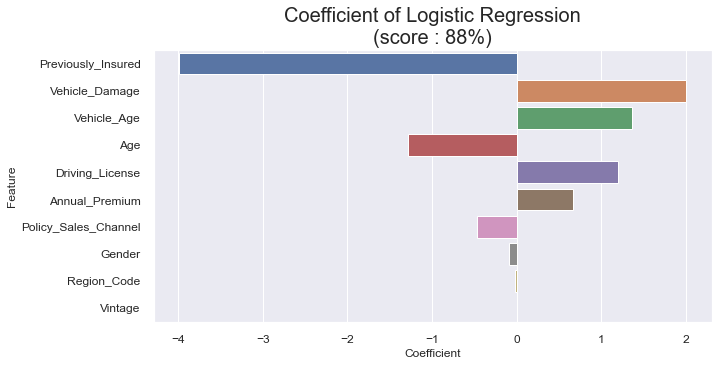

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=coefdf, y=coefdf['Feature'], x=coefdf['Coef'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Coefficient of Logistic Regression\n(score : 88%)', fontsize=20)
plt.xlabel('Coefficient')

plt.savefig('Coefficient of Logistic Regression.png')
plt.show()

In [31]:
import shap

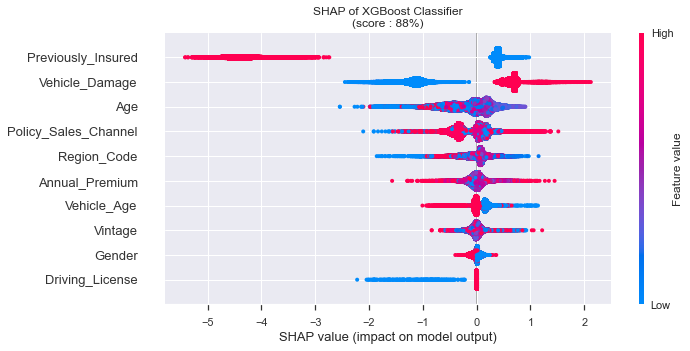

In [32]:
XGBmodel = XGBClassifier().fit(X_train, y_train)

explainer = shap.TreeExplainer(XGBmodel)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_size=(10,5), show=False)
plt.title('SHAP of XGBoost Classifier\n(score : 88%)')
plt.figsize=(10,5)
plt.show()

In [33]:
RFmodel = RandomForestClassifier().fit(X_train, y_train)

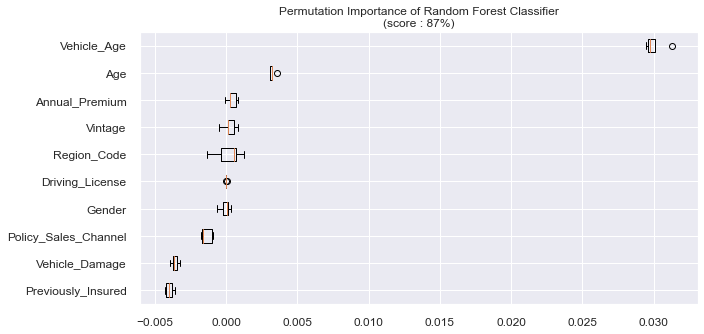

In [34]:
from sklearn.inspection import permutation_importance

#result = permutation_importance(RFmodel, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
result = permutation_importance(RFmodel, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,5))
plt.title('Permutation Importance of Random Forest Classifier\n(score : 87%)')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=X_test.columns[sorted_idx]);

In [35]:
#RFmodel = RandomForestClassifier().fit(X_train, y_train)

#explainer = shap.TreeExplainer(RFmodel)
#shap_values = explainer.shap_values(X_test)

#shap.summary_plot(shap_values, X_test, plot_size=(10,5), show=False)
#plt.title('SHAP of Random Forest Classifier\n(score : 87%)')
#plt.show()

## Long time process


Whether already has insurance or not(Previously_Insured) was the most important attribute to predict the customer's response.

Whether someone's vehicle got damaged or not was also significant feature as much as 'Previously_Insured'.

The older the vehicle is, the more likely to be interested.

Older people tend to pay more attention about insurance than young people do.

How long the customer has been associated with the company('Vintage') or how did reach to the customer('Policy_Sales_Channel'), even gender or region were not that influential.

In conclusion, targeting on the older customer how got damaged old vehichle would be the most cost-efficient marketing strategy no matter how(e-mail, phone call, in person or wathever it is).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')


train_df= pd.read_csv("E:/github/Health Insurance Cross Sell Prediction/train.csv")
test_df = pd.read_csv("E:/github/Health Insurance Cross Sell Prediction/test.csv")

In [37]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


Checking for null value

In [40]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [41]:
test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

The majority are not interested in the vehicle insurance

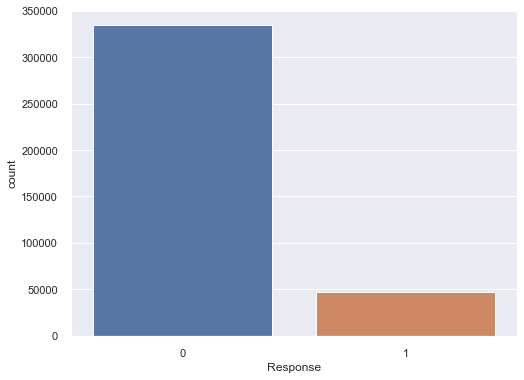

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x='Response', data= train_df)
plt.show()

Gender

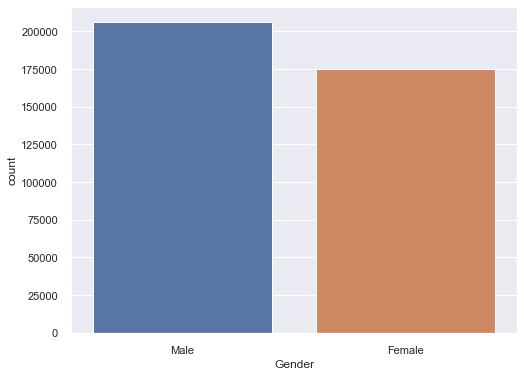

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data= train_df)
plt.show()

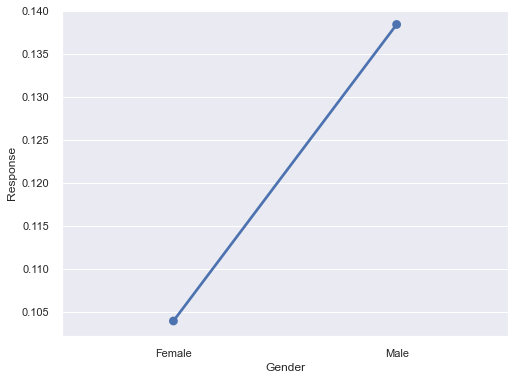

In [44]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Gender')['Response'].sum() / tmp_df.groupby('Gender')['Response'].count()

plt.figure(figsize=(8,6))
sns.pointplot(x='Gender', y='Response', data=tmp_df.reset_index())
plt.show()

Males are more likely to be interested. However, this is not intuitive. It can be due to pure randomness or other factors.

Age

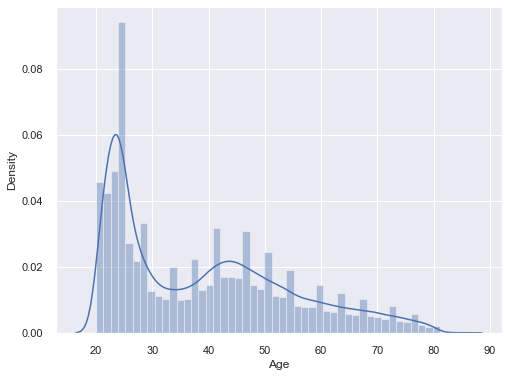

The maximum age is 85
The minimum age is 20


In [45]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Age'])
plt.show()

print('The maximum age is {}'.format(train_df['Age'].max()))
print('The minimum age is {}'.format(train_df['Age'].min()))

The maximum age of the dataset is 85. This makes me wonder whether it is suitable for them to drive at all.

<Figure size 576x432 with 0 Axes>

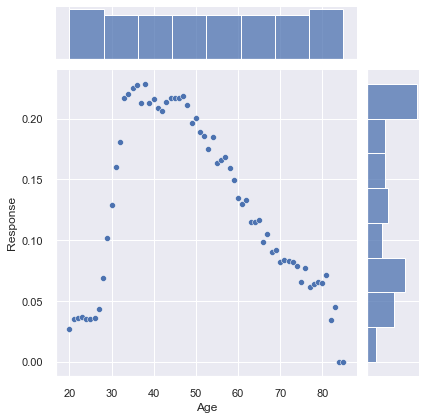

In [46]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Age')['Response'].sum() / tmp_df.groupby('Age')['Response'].count()

plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Response', data=tmp_df.reset_index())
plt.show()


Unsurprisingly, those who are very old are not interested in buying the vehicle insurance.

Those who are very young also are not interested. This may be because they are more risk tolerant and underestimate the importance of insurance.

It makes sense that people in their middle age are more interested.


Whether they have a driving license

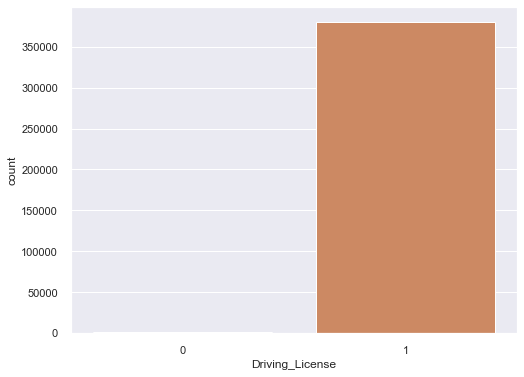

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Driving_License'])
plt.show()

Most people have a driving license

<Figure size 576x432 with 0 Axes>

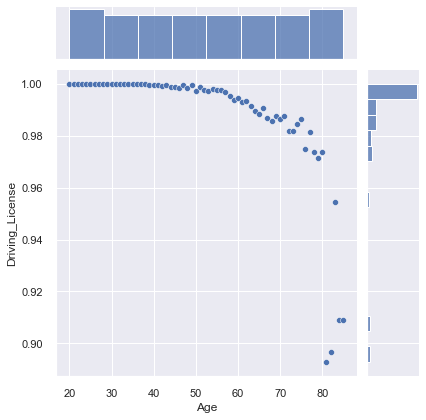

In [48]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Age')['Driving_License'].sum() / tmp_df.groupby('Age')['Driving_License'].count()

plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Driving_License', data=tmp_df.reset_index())
plt.show()

People under 50 almost always have a driving license and then the proportion starts to decrease when they get older

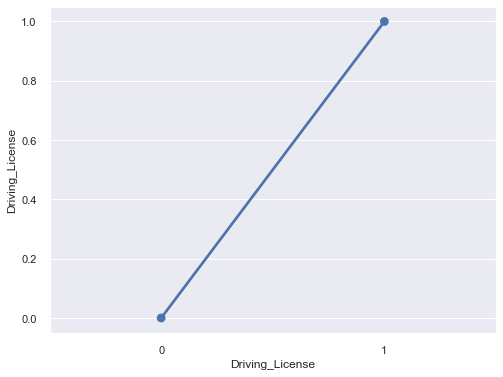

In [49]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Driving_License')['Driving_License'].sum() / tmp_df.groupby('Driving_License')['Response'].count()

plt.figure(figsize=(8,6))
sns.pointplot(x='Driving_License', y='Driving_License', data=tmp_df.reset_index())
plt.show()

This is obvious. We should target those who have a driving license.

Region

In [50]:
print(set(train_df['Region_Code']))
print('Number of regions: {}'.format(len(set(train_df['Region_Code']))))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0}
Number of regions: 53


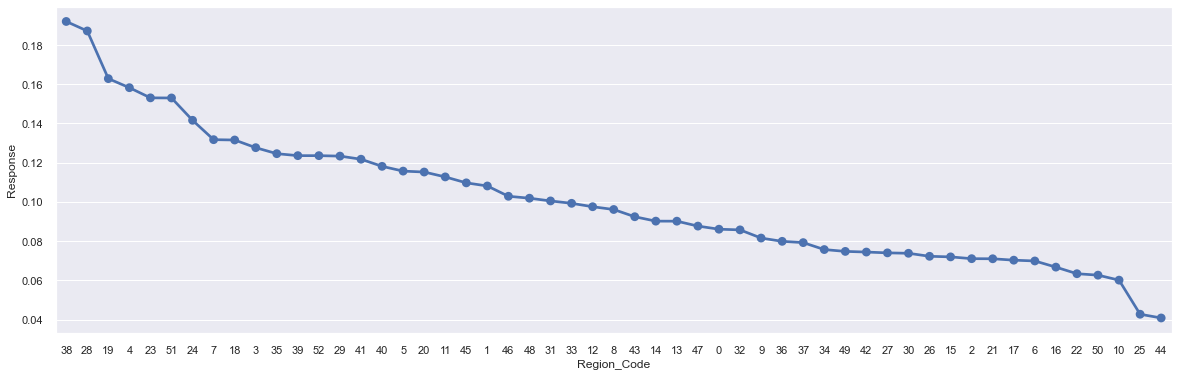

In [51]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Region_Code')['Response'].sum() / tmp_df.groupby('Region_Code')['Response'].count()
tmp_df = tmp_df.reset_index()
tmp_df['Region_Code'] = tmp_df['Region_Code'].apply(lambda x: str(int(x)))

plt.figure(figsize=(20, 6))
sns.pointplot(x='Region_Code', y='Response', data=tmp_df.sort_values(by=['Response'], ascending=False))
plt.show()


Region can be correlated to response:

    Some region may be busier, thus higher demand of vehicle insurance.
    However, there are too many regions. If the insurance company has more information about each region, that might be more insightful.


Whether they have vehicle insurance already

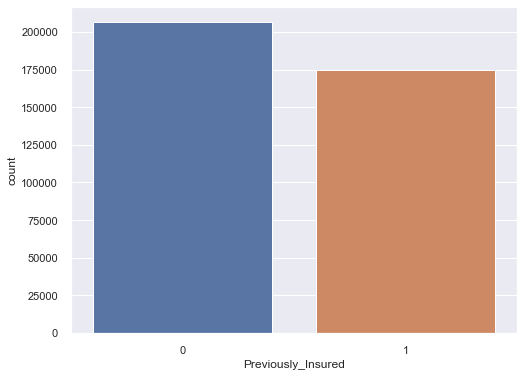

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Previously_Insured'])
plt.show()

<Figure size 576x432 with 0 Axes>

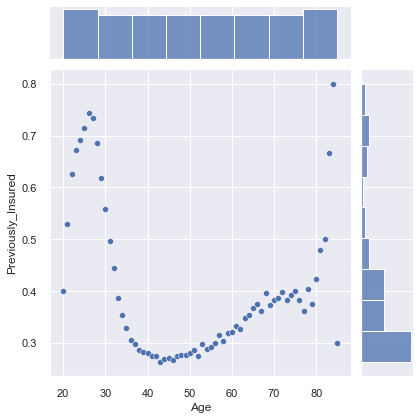

In [53]:
tmp_df = train_df.copy()
tmp_df = tmp_df[tmp_df['Driving_License'] == 1]
tmp_df = tmp_df.groupby('Age')['Previously_Insured'].sum() / tmp_df.groupby('Age')['Previously_Insured'].count()

plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Previously_Insured', data=tmp_df.reset_index())
plt.show()

Those between age 40 and age 50 are most unlikely to have a vehicle insurance policy already.

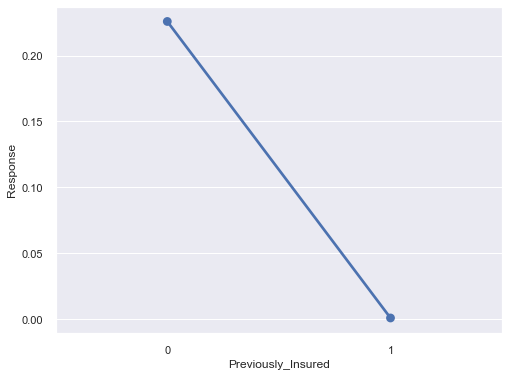

In [54]:
tmp_df = train_df.copy()
tmp_df = tmp_df[tmp_df['Driving_License'] == 1]
tmp_df = tmp_df.groupby('Previously_Insured')['Response'].sum() / tmp_df.groupby('Previously_Insured')['Response'].count()

plt.figure(figsize=(8,6))
sns.pointplot(x='Previously_Insured', y='Response', data=tmp_df.reset_index())
plt.show()


While this is self-explanatory. We should be careful of those who already have vehicle insurance. Because why would they want another vehicle insurance policy? Does it indicate adverse selection?

Adverse selection means that individuals with higher-than-average risks are more willing to buy insurance, especially insurance with high limit. This is not actuarially equitable to those with average risks if these individuals are charged the same amount of premium. Underwriters have to pay attention to this issue when they indicate that they want to buy another policy.


Age of the vehicle

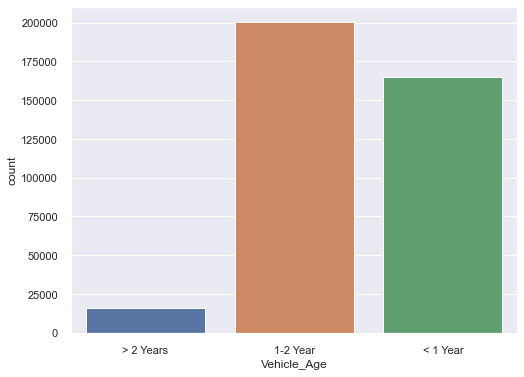

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Vehicle_Age'])
plt.show()

Although the age of the vehicle is numerical in nature, it is given as categorical input.

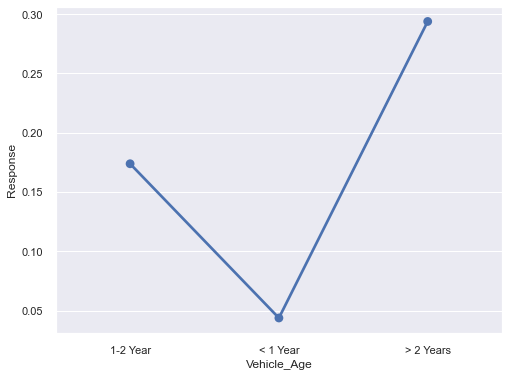

In [56]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Vehicle_Age')['Response'].sum() / tmp_df.groupby('Vehicle_Age')['Response'].count()

plt.figure(figsize=(8,6))
sns.pointplot(x='Vehicle_Age', y='Response', data=tmp_df.reset_index())
plt.show()


There is not a clear direction as to how this will drive their decision. Perhaps more insight can be extracted if the vehicle age is given in number.

We may consider these questions:

    Will new car owners be more interested in buying vehicle insurance because they are more vulnerable to any damage to their vehicle?
    Will old car owners be more interested in buying vehicle insurance because they expect higher probability of accidents?


Whether they have got their vehicle damaged before

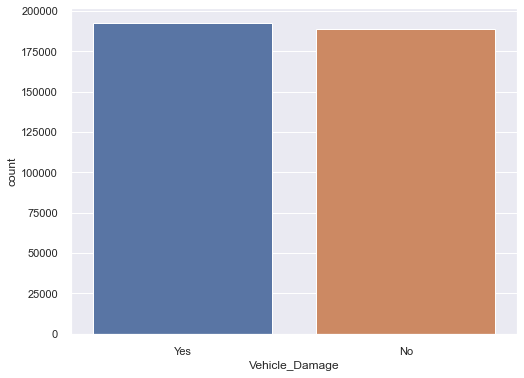

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Vehicle_Damage'])
plt.show()

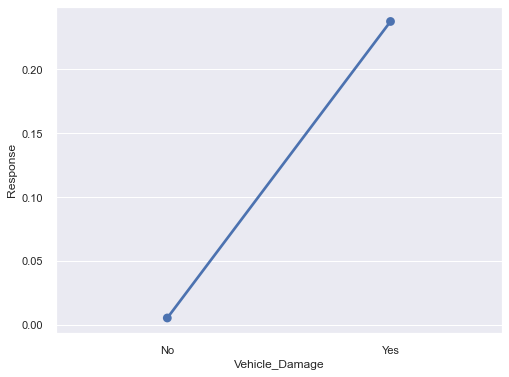

In [58]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Vehicle_Damage')['Response'].sum() / tmp_df.groupby('Vehicle_Damage')['Response'].count()

plt.figure(figsize=(8,6))
sns.pointplot(x='Vehicle_Damage', y='Response', data=tmp_df.reset_index())
plt.show()


This is in fact an extremely important factor for the insurance company. If individuals have got their vehicle damaged before, it usually indicates that they possess higher-than-average risks, thus adverse selection.

The insurance company may charge them higher premium. While our "task" is to predict who will be interested in buying insurance policy, the insurance company ought to consider whether they want to attract higher risks.


Annual Premium

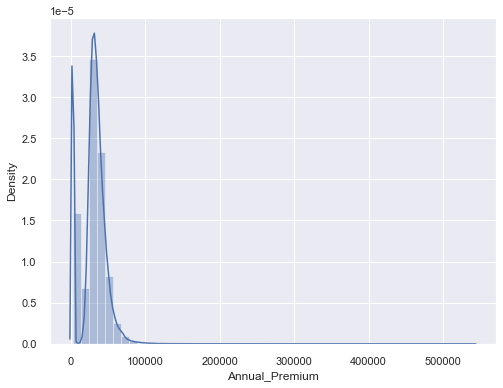

The mean annual premium is 30564.39
The median annual premium is 31669.00
The maximum annual premium is 540165.00
The minimum annual premium is 2630.00
99% of people's annual premium is less than 72963.00


In [59]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Annual_Premium'])
plt.show()

print('The mean annual premium is {:.2f}'.format(train_df['Annual_Premium'].mean()))
print('The median annual premium is {:.2f}'.format(train_df['Annual_Premium'].median()))
print('The maximum annual premium is {:.2f}'.format(train_df['Annual_Premium'].max()))
print('The minimum annual premium is {:.2f}'.format(train_df['Annual_Premium'].min()))
print('99% of people\'s annual premium is less than {:.2f}'.format(train_df['Annual_Premium'].quantile(0.99)))

This is quite positively skewed.

<Figure size 576x432 with 0 Axes>

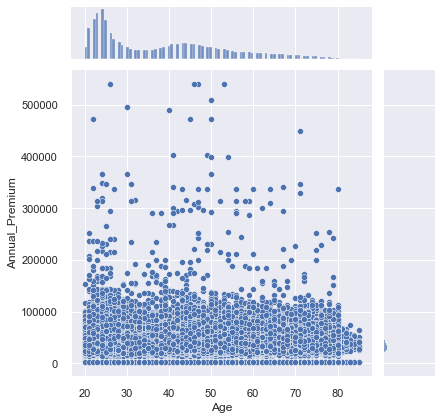

In [60]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Annual_Premium', data=train_df)
plt.show()

Normally we would expect premium to be positively correlated with age because older people are charged higher premium.

In [61]:
train_df[['Age', 'Annual_Premium']].corr()

,Age,Annual_Premium
Age,1.000000,0.067507
Annual_Premium,0.067507,1.000000


They are still positively correlated but very weakly. This is perhaps because there is great differentiation between health insurance policies. There are policies with different limits and benefits so they are charged differently.

In [62]:
train_df[['Annual_Premium', 'Response']].corr()

,Annual_Premium,Response
Annual_Premium,1.000000,0.022575
Response,0.022575,1.000000


There is a weak positive correlation between annual premium and response. This is reasonable between those who can afford an expensive health insurance policy are probably richer.

<Figure size 576x432 with 0 Axes>

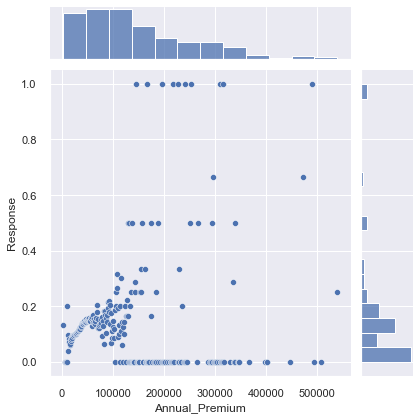

In [63]:
tmp_df = train_df.copy()
tmp_df['Annual_Premium'] = tmp_df['Annual_Premium'].apply(lambda x: round(x, -3))
tmp_df = tmp_df.groupby('Annual_Premium')['Response'].sum() / tmp_df.groupby('Annual_Premium')['Response'].count()

plt.figure(figsize=(8,6))
sns.jointplot(x='Annual_Premium', y='Response', data=tmp_df.reset_index())
plt.show()

<Figure size 576x432 with 0 Axes>

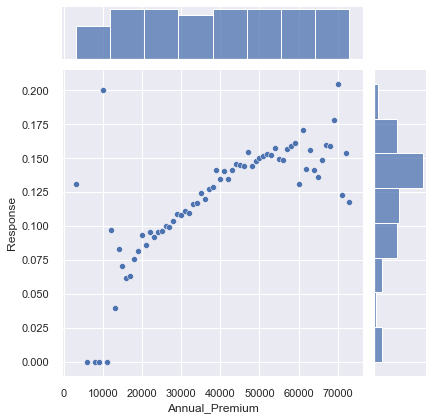

In [64]:
tmp_df = train_df.copy()
tmp_df = tmp_df[tmp_df['Annual_Premium'] < 72963]
tmp_df['Annual_Premium'] = tmp_df['Annual_Premium'].apply(lambda x: round(x, -3))
tmp_df = tmp_df.groupby('Annual_Premium')['Response'].sum() / tmp_df.groupby('Annual_Premium')['Response'].count()

plt.figure(figsize=(8,6))
sns.jointplot(x='Annual_Premium', y='Response', data=tmp_df.reset_index())
plt.show()

There is a clear positive correlation. It is just distorted by the outliers. 72963 is the 99th percentile as discussed above.

Policy Sales Channel

In [65]:
print(set(train_df['Policy_Sales_Channel']))
print('Number of policy sales channels: {}'.format(len(set(train_df['Policy_Sales_Channel']))))

{1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 73.0, 74.0, 75.0, 76.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 163.0}
Number of policy 

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
          ...  
102.0         3
33.0          3
28.0          3
27.0          3
75.0          2
74.0          2
50.0          2
112.0         2
41.0          1
43.0          1
149.0         1
84.0          1
123.0         1
144.0         1
143.0         1
Name: Response, Length: 155, dtype: int64
    Policy_Sales_Channel  Response
118                  123  1.000000
41                    43  1.000000
25                    27  0.333333
26                    28  0.333333
34                    36  0.326923
148                  155  0.320097
154                  163  0.304183
2                      3  0.304015
116                  121  0.296875
96                   101  0.285714
82                    87  0.285714
76                   

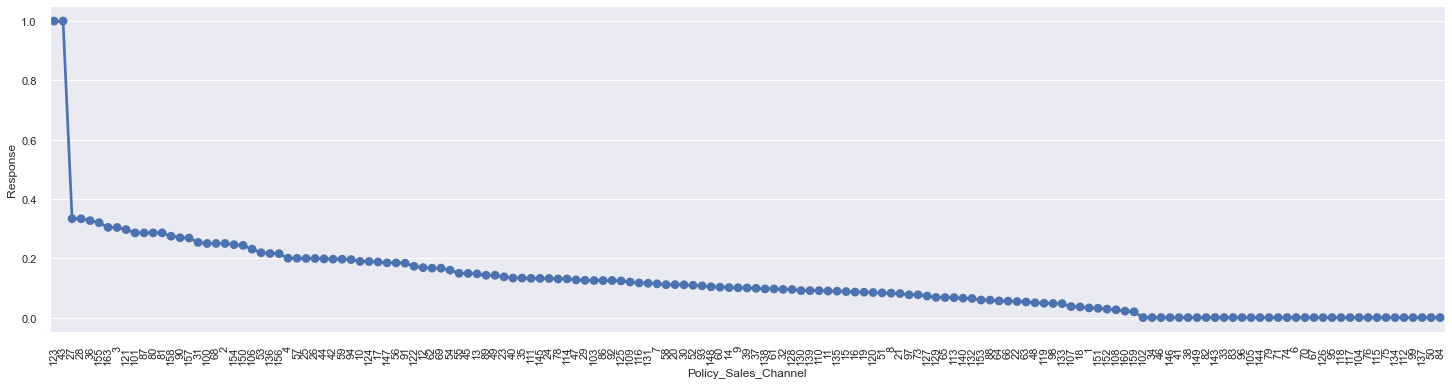

In [66]:
tmp_df = train_df.copy()
print(tmp_df.groupby('Policy_Sales_Channel')['Response'].count().sort_values(ascending=False))
tmp_df = tmp_df.groupby('Policy_Sales_Channel')['Response'].sum() / tmp_df.groupby('Policy_Sales_Channel')['Response'].count()
tmp_df = tmp_df.reset_index()
tmp_df['Policy_Sales_Channel'] = tmp_df['Policy_Sales_Channel'].apply(lambda x: str(int(x)))

print(tmp_df.sort_values(by=['Response'], ascending=False))

plt.figure(figsize=(25, 6))
sns.pointplot(x='Policy_Sales_Channel', y='Response', data=tmp_df.sort_values(by=['Response'], ascending=False))
plt.xticks(rotation='vertical')
plt.show()

There is correlation between policy sales channel and response. However, because there are too many channels, the sample size of each is small. For example, channel 123 has a response rate of 100% but the count is only 1. That does not mean anything significant.


Vintage

The number of days that they have been associated with the company


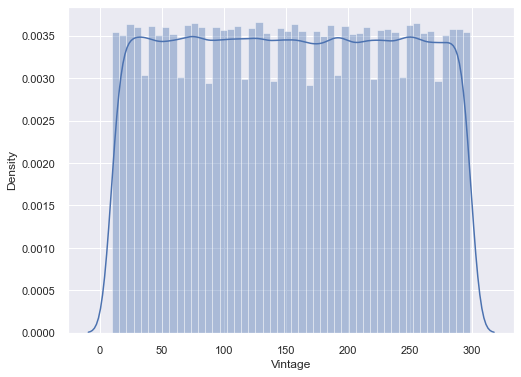

In [67]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Vintage'])
plt.show()

<Figure size 576x432 with 0 Axes>

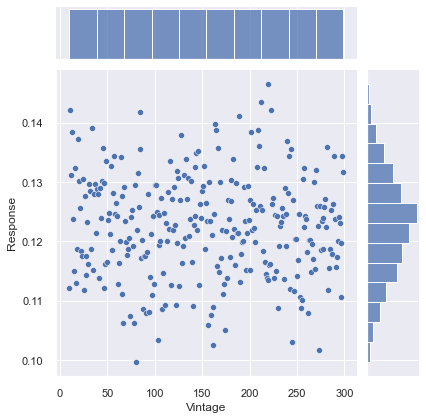

In [68]:
tmp_df = train_df.copy()
tmp_df = tmp_df.groupby('Vintage')['Response'].sum() / tmp_df.groupby('Vintage')['Response'].count()

plt.figure(figsize=(8,6))
sns.jointplot(x='Vintage', y='Response', data=tmp_df.reset_index())
plt.show()

I am not surprised that there is no clear correlation because the vintage is too low (< 300 days). I would expect loyal customers to be more willing to buy a policy from this insurance company (whether they already have one or not). However, these seem to be new customers.


Categorical input

As noted above, there are 53 region codes and 153 sales channels. Transforming them into dummy variables would result in a lot of columns.

As this notebook is going to use CatBoost, there is no need to transform the categorical input into dummy variables.

CatBoost provides us with a convenient way to model the data. But be aware that the float has to been converted to int.


In [69]:
GENDER_MAPPING = {'Female': 0, 'Male': 1}
VEHICLE_AGE_MAPPING = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
VEHICLE_DAMAGE_MAPPING = {'No': 0, 'Yes': 1}

train_df['Gender'] = train_df['Gender'].map(GENDER_MAPPING).astype(int)
test_df['Gender'] = test_df['Gender'].map(GENDER_MAPPING).astype(int)
train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map(VEHICLE_AGE_MAPPING).astype(int)
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map(VEHICLE_AGE_MAPPING).astype(int)
train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].map(VEHICLE_DAMAGE_MAPPING).astype(int)
test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].map(VEHICLE_DAMAGE_MAPPING).astype(int)

train_df['Region_Code'] = train_df['Region_Code'].astype(int)
test_df['Region_Code'] = test_df['Region_Code'].astype(int)

train_df['Policy_Sales_Channel'] = train_df['Policy_Sales_Channel'].astype(int)
test_df['Policy_Sales_Channel'] = test_df['Policy_Sales_Channel'].astype(int)

Numerical input

Here applies the min-max normalisation. Another common way of preprocessing numerical input is standardisation, which subtracts the mean from each datum and divides it by the standard deviation.

Min-max normalisation puts the input in a confined range, i.e. from 0 to 1, whereas standardisation would result in variables that range from negative to positive.

In [70]:
min_age = train_df['Age'].min()
max_age = train_df['Age'].max()
train_df['Age'] = train_df['Age'].apply(lambda x: (x - min_age) / (max_age - min_age))
test_df['Age'] = test_df['Age'].apply(lambda x: (x - min_age) / (max_age - min_age))

min_vintage = train_df['Vintage'].min()
max_vintage = train_df['Vintage'].max()
train_df['Vintage'] = train_df['Vintage'].apply(lambda x: (x - min_vintage) / (max_vintage - min_vintage))
test_df['Vintage'] = test_df['Vintage'].apply(lambda x: (x - min_vintage) / (max_vintage - min_vintage))

For premium, I'd like to separate those whose premium is higher than 72963, the 99th percentile.

In [71]:
min_annual_premium = train_df['Annual_Premium'].min()
premium_theshold = 72963
max_annual_premium = train_df['Annual_Premium'].max()

train_df['Premium_Below_72963'] = train_df['Annual_Premium'].apply(lambda x: (min(x, premium_theshold) - min_annual_premium) / (premium_theshold - min_annual_premium))
test_df['Premium_Below_72963'] = test_df['Annual_Premium'].apply(lambda x: (min(x, premium_theshold) - min_annual_premium) / (premium_theshold - min_annual_premium))
train_df['Premium_Above_72963'] = train_df['Annual_Premium'].apply(lambda x: max(0, x - premium_theshold) / (max_annual_premium - premium_theshold))
test_df['Premium_Above_72963'] = test_df['Annual_Premium'].apply(lambda x: max(0, x - premium_theshold) / (max_annual_premium - premium_theshold))

CatBoost

In [72]:
numerical_cols = ['Age', 'Premium_Below_72963', 'Premium_Above_72963', 'Vintage']
categorical_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

In fact I'd like to drop Vintage because there is no sensible correlation (the number of days is too low).

In [73]:
numerical_cols.remove('Vintage')

Here divides the first dataset into training dataset and validation dataset. The validation dataset is used to evaluate the predictive power of the model. As a rule of thumb, 80% is used for training.

In [74]:
X_col = numerical_cols + categorical_cols
print(X_col)

['Age', 'Premium_Below_72963', 'Premium_Above_72963', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']


In [75]:
X = train_df[X_col]
y = train_df['Response']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [76]:
model = CatBoostClassifier()
model = model.fit(
    X_train,
    y_train,
    cat_features=categorical_cols,
    eval_set=(X_val, y_val),
    early_stopping_rounds=10,
    verbose=100
)

Learning rate set to 0.130164
0:	learn: 0.4923865	test: 0.4923016	best: 0.4923016 (0)	total: 793ms	remaining: 13m 12s
100:	learn: 0.2633412	test: 0.2638853	best: 0.2638853 (100)	total: 57.8s	remaining: 8m 34s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2635817215
bestIteration = 168

Shrink model to first 169 iterations.


Evaluation

In [77]:
y_pred = [i[1] for i in model.predict_proba(X_val)]
print('Validation ROC AUC: {}'.format(roc_auc_score(y_val, y_pred)))

Validation ROC AUC: 0.8609391497290894


ROC AUC is above 80%, which indicates that the model is pretty good.

CatBoost allows us to easily know the importance of features.

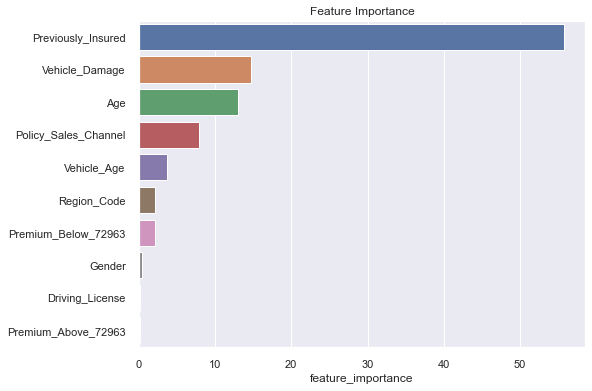

In [78]:
feature_importance = model.get_feature_importance()
feature_importance_df = pd.DataFrame(
    data={'feature_importance': feature_importance},
    index=X_col
)
feature_importance_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance_df['feature_importance'], y=feature_importance_df.index)
plt.title('Feature Importance')
plt.show()


The two most impactful features are:

    whether they already have vehicle insurance
    whether they have got their vehicle damaged before

As discussed above, the contribution of these two factors can imply adverse selection. Even if we correctly predict their willingness to buy, it may not be desirable. The insurance company might charge them higher premium or not target them at all.


We can also plot the tree.

In [79]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

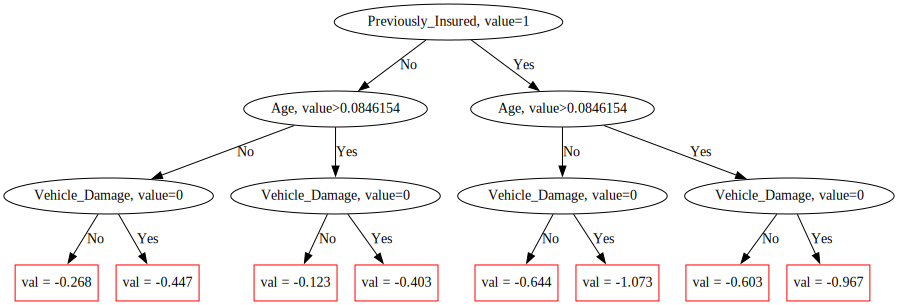

In [80]:
import graphviz
model.plot_tree(
    tree_idx=0,
    pool=X_train
)

Output

In [81]:
y_pred_submit = [i[1] for i in model.predict_proba(test_df[X_col])]
submission_df = pd.DataFrame(data={'Passenger': test_df['id'], 'Response': y_pred_submit})

In [82]:
submission_df.head()

,Passenger,Response
0,381110,0.000350
1,381111,0.299720
2,381112,0.292217
3,381113,0.005863
4,381114,0.000398


In [83]:
submission_df.to_csv('submission.csv', index=False)


Afterthought

While the model result is satisfactory, it does not necessarily translate to good decision making. As discussed over and over, adverse selection is an issue that needs to be tackled.

Besides, the insurance company should obtain more data in order to have more insightful analysis:

    Investigate the relationship between age and willingness to buy insurance. Does risk tolerance play a role?
    Develop a profile of regions (we've only got pure numerical identifier). Perhaps people in busier regions are more willing to buy insurance.
    Obtain more accurate age of the vehicle.
    Obtain the type of health insurance policy that the individual is buying. This can reveal how rich they are.
    Policy sales channels can play a role (e.g. agent channels are more effective due to interpersonal relationship). The number of channels in this dataset is too high. Perhaps they can be grouped.
    Vintage can play a role (e.g. we would expect loyal customers to be more willing to buy a policy). However, this dataset only contains new customers.
